In [141]:
var openDigger = require('../src/open_digger');
var labelData = openDigger.label.getLabelData(724712);
var years = [2015,2016, 2017, 2018, 2019, 2020, 2021];
var repo_id = 724712
var query = openDigger.driver.clickhouse.query;

任务1


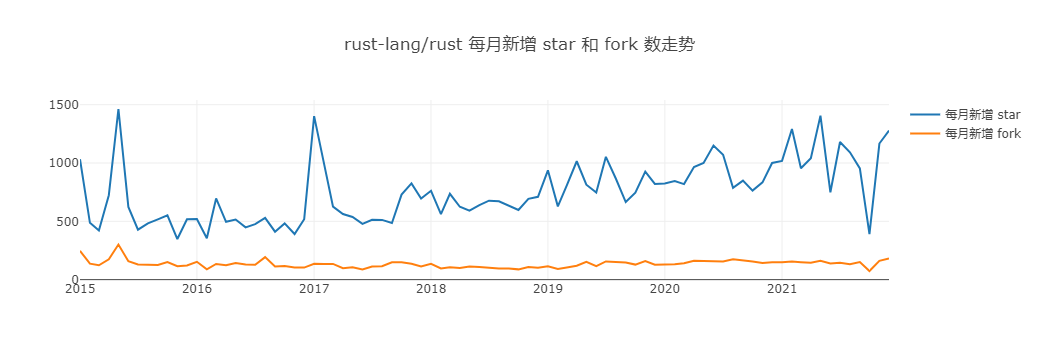

┌─────────┬───────────┬───────────┬──────────┐
│ (index) │   date    │ watch_cnt │ star_cnt │
├─────────┼───────────┼───────────┼──────────┤
│    0    │ '2015-1'  │  '1033'   │  '247'   │
│    1    │ '2015-2'  │   '487'   │  '137'   │
│    2    │ '2015-3'  │   '421'   │  '123'   │
│    3    │ '2015-4'  │   '724'   │  '174'   │
│    4    │ '2015-5'  │  '1463'   │  '301'   │
│    5    │ '2015-6'  │   '623'   │  '158'   │
│    6    │ '2015-7'  │   '428'   │  '130'   │
│    7    │ '2015-8'  │   '482'   │  '125'   │
│    8    │ '2015-9'  │   '517'   │  '125'   │
│    9    │ '2015-10' │   '551'   │  '151'   │
│   10    │ '2015-11' │   '348'   │  '115'   │
│   11    │ '2015-12' │   '518'   │  '122'   │
│   12    │ '2016-1'  │   '520'   │  '153'   │
│   13    │ '2016-2'  │   '355'   │   '88'   │
│   14    │ '2016-3'  │   '696'   │  '134'   │
│   15    │ '2016-4'  │   '496'   │  '123'   │
│   16    │ '2016-5'  │   '515'   │  '143'   │
│   17    │ '2016-6'  │   '448'   │  '129'   │
│   18    │ '

In [134]:
console.log("任务1");
query(`
    select distinct yearmonth, type1, type2, cnt1, cnt2 from 
    (select toYear(created_at)*100+toMonth(created_at) as yearmonth, type as type1, count(1) as cnt1
    from github_log.events
    where repo_id=${repo_id} and type = 'WatchEvent' and toYear(created_at) < 2022
    group by (yearmonth, type)
    order by yearmonth) ta,
    (select toYear(created_at)*100+toMonth(created_at) as yearmonth, type as type2, count(1) as cnt2
    from github_log.events
    where repo_id=${repo_id} and type = 'ForkEvent' and toYear(created_at) < 2022
    group by (yearmonth, type)
    order by yearmonth) tb where ta.yearmonth = tb.yearmonth
    `
).then(data => {
    var date = [], watch_event = [], star_event = [], watch_cnt = [], star_cnt = [];
    data.map((row) => {
            year_month = Math.round(row.yearmonth/100) + '-' + (row.yearmonth%100);
            date.push(year_month);
            watch_event.push(row.type1);
            watch_cnt.push(row.cnt1);
            star_event.push(row.type2);
            star_cnt.push(row.cnt2); 
    });
    openDigger.render.plotly([{x:date, y:watch_cnt, name: "每月新增 star"}, 
                              {x:date, y:star_cnt, name: "每月新增 fork"}], 
                             {title: 'rust-lang/rust 每月新增 star 和 fork 数走势'});
    function Fork(date,watch_cnt,star_cnt){
    this.date = date;
    this.watch_cnt = watch_cnt;
    this.star_cnt = star_cnt;
    }
    var fork = [];
    for(var i = 0; i < date.length; i++){
        var tmp = new Fork(date[i],watch_cnt[i],star_cnt[i]);
        fork.push(tmp);
    }
    console.table(fork);
});

任务2


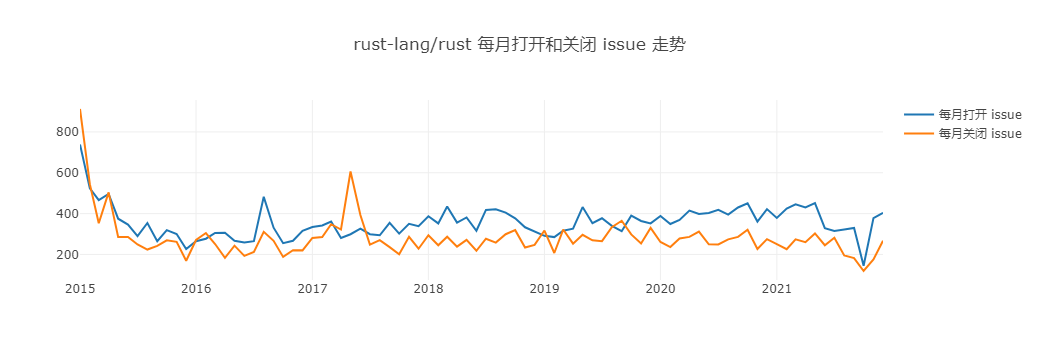

┌─────────┬───────────┬────────────┬────────────┐
│ (index) │   date    │ opened_cnt │ closed_cnt │
├─────────┼───────────┼────────────┼────────────┤
│    0    │ '2015-1'  │   '738'    │   '912'    │
│    1    │ '2015-2'  │   '524'    │   '544'    │
│    2    │ '2015-3'  │   '466'    │   '353'    │
│    3    │ '2015-4'  │   '496'    │   '504'    │
│    4    │ '2015-5'  │   '375'    │   '286'    │
│    5    │ '2015-6'  │   '346'    │   '286'    │
│    6    │ '2015-7'  │   '290'    │   '249'    │
│    7    │ '2015-8'  │   '354'    │   '224'    │
│    8    │ '2015-9'  │   '265'    │   '242'    │
│    9    │ '2015-10' │   '319'    │   '269'    │
│   10    │ '2015-11' │   '300'    │   '262'    │
│   11    │ '2015-12' │   '226'    │   '169'    │
│   12    │ '2016-1'  │   '265'    │   '271'    │
│   13    │ '2016-2'  │   '277'    │   '305'    │
│   14    │ '2016-3'  │   '305'    │   '251'    │
│   15    │ '2016-4'  │   '306'    │   '183'    │
│   16    │ '2016-5'  │   '267'    │   '243'    │


In [135]:
console.log("任务2");
query(`
    select distinct yearmonth, opened_cnt, closed_cnt from 
    (select toYear(created_at)*100+toMonth(created_at) as yearmonth, count(1) as opened_cnt
    from github_log.events
    where repo_id=${repo_id} and action = 'opened' and toYear(created_at) < 2022 and type in ('IssuesEvent')
    group by (yearmonth, type)
    order by yearmonth) ta,
    (select toYear(created_at)*100+toMonth(created_at) as yearmonth, count(1) as closed_cnt
    from github_log.events
    where repo_id=${repo_id} and action = 'closed' and toYear(created_at) < 2022 and type in ('IssuesEvent')
    group by (yearmonth, type)
    order by yearmonth) tb where ta.yearmonth = tb.yearmonth
    `
).then(data => {
    var date = [], closed_cnt = [], opened_cnt = [];
    data.map((row) => {
            year_month = Math.round(row.yearmonth/100) + '-' + (row.yearmonth%100);
            date.push(year_month);
            opened_cnt.push(row.opened_cnt);
            closed_cnt.push(row.closed_cnt); 
    });
    openDigger.render.plotly([{x:date, y:opened_cnt, name: "每月打开 issue"}, 
                              {x:date, y:closed_cnt, name: "每月关闭 issue"}], 
                             {title: 'rust-lang/rust 每月打开和关闭 issue 走势'});
    function Fork(date,opened_cnt,closed_cnt){
    this.date = date;
    this.opened_cnt = opened_cnt;
    this.closed_cnt = closed_cnt;
    }
    var fork = [];
    for(var i = 0; i < date.length; i++){
        var tmp = new Fork(date[i],opened_cnt[i],closed_cnt[i]);
        fork.push(tmp);
    }
    console.table(fork);
});

任务3


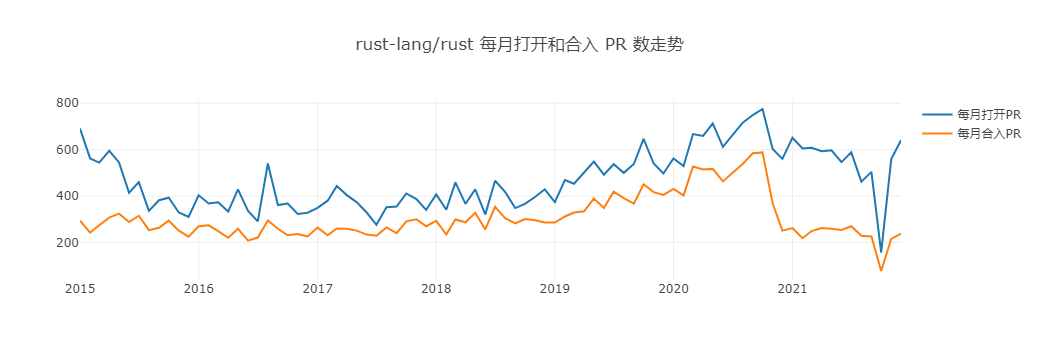

┌─────────┬───────────┬─────────┬──────────┐
│ (index) │  pr_date  │ pr_open │ pr_merge │
├─────────┼───────────┼─────────┼──────────┤
│    0    │ '2015-1'  │  '691'  │  '294'   │
│    1    │ '2015-2'  │  '562'  │  '242'   │
│    2    │ '2015-3'  │  '544'  │  '274'   │
│    3    │ '2015-4'  │  '595'  │  '307'   │
│    4    │ '2015-5'  │  '545'  │  '324'   │
│    5    │ '2015-6'  │  '414'  │  '288'   │
│    6    │ '2015-7'  │  '460'  │  '315'   │
│    7    │ '2015-8'  │  '336'  │  '253'   │
│    8    │ '2015-9'  │  '382'  │  '263'   │
│    9    │ '2015-10' │  '393'  │  '294'   │
│   10    │ '2015-11' │  '329'  │  '251'   │
│   11    │ '2015-12' │  '310'  │  '225'   │
│   12    │ '2016-1'  │  '403'  │  '270'   │
│   13    │ '2016-2'  │  '368'  │  '274'   │
│   14    │ '2016-3'  │  '373'  │  '249'   │
│   15    │ '2016-4'  │  '333'  │  '220'   │
│   16    │ '2016-5'  │  '429'  │  '259'   │
│   17    │ '2016-6'  │  '336'  │  '208'   │
│   18    │ '2016-7'  │  '291'  │  '221'   │
│   19    

In [193]:
console.log("任务3");
query(`
        select yearmonth, opened, opened_cnt, closed, merged_cnt from
        (select toYear(created_at)*100+toMonth(created_at) as yearmonth, action as opened, count(1) as opened_cnt
        from github_log.events
        where repo_id=${repo_id} and type in ('PullRequestEvent') and action = 'opened' and toYear(created_at) < 2022
        group by (yearmonth,action))ta,
        (select toYear(created_at)*100+toMonth(created_at) as yearmonth, action as closed, count(1) as merged_cnt
        from github_log.events
        where repo_id=${repo_id} and type in ('PullRequestEvent') and action = 'closed' and pull_merged = 1 and toYear(created_at) < 2022
        group by (yearmonth,action))tb where ta.yearmonth = tb.yearmonth
        order by yearmonth
`).then(data => {
    var date = [], opened_cnt = [], merged_cnt = [];
    data.map((row) => {
            year_month = Math.round(row.yearmonth/100) + '-' + (row.yearmonth%100);
            date.push(year_month);
            opened_cnt.push(row.opened_cnt);
            merged_cnt.push(row.merged_cnt);    
    });
     openDigger.render.plotly([{x:date, y:opened_cnt, name: "每月打开PR"},{x:date, y:merged_cnt, name: "每月合入PR"}], 
                             {title: 'rust-lang/rust 每月打开和合入 PR 数走势'});
    function PR(pr_date,pr_open,pr_merge){
        this.pr_date = pr_date;
        this.pr_open = pr_open;
        this.pr_merge = pr_merge;

    }
    var pr = [];
    for(var i = 0; i < date.length; i++){
        var tmp = new PR(date[i],opened_cnt[i],merged_cnt[i]);
        pr.push(tmp);
    }
    console.table(pr);
});

任务4


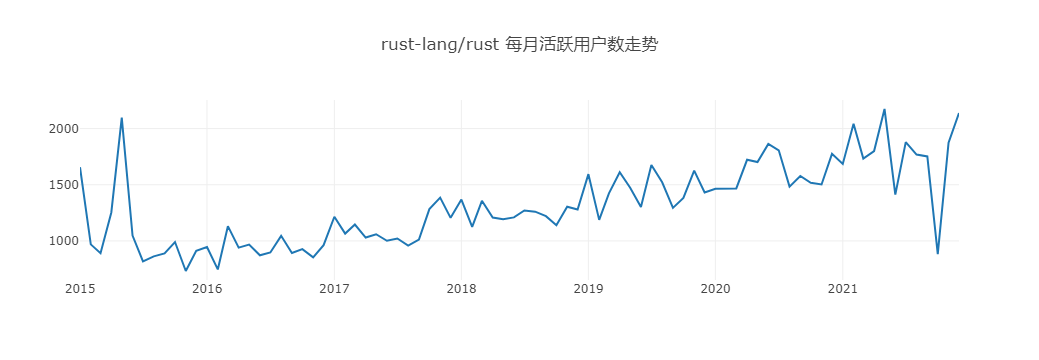

┌─────────┬────────────┬───────────┐
│ (index) │ actor_date │ actor_num │
├─────────┼────────────┼───────────┤
│    0    │  '2015-1'  │  '1656'   │
│    1    │  '2015-2'  │   '969'   │
│    2    │  '2015-3'  │   '891'   │
│    3    │  '2015-4'  │  '1253'   │
│    4    │  '2015-5'  │  '2098'   │
│    5    │  '2015-6'  │  '1048'   │
│    6    │  '2015-7'  │   '818'   │
│    7    │  '2015-8'  │   '862'   │
│    8    │  '2015-9'  │   '889'   │
│    9    │ '2015-10'  │   '990'   │
│   10    │ '2015-11'  │   '732'   │
│   11    │ '2015-12'  │   '911'   │
│   12    │  '2016-1'  │   '945'   │
│   13    │  '2016-2'  │   '746'   │
│   14    │  '2016-3'  │  '1131'   │
│   15    │  '2016-4'  │   '940'   │
│   16    │  '2016-5'  │   '967'   │
│   17    │  '2016-6'  │   '872'   │
│   18    │  '2016-7'  │   '897'   │
│   19    │  '2016-8'  │  '1045'   │
│   20    │  '2016-9'  │   '893'   │
│   21    │ '2016-10'  │   '927'   │
│   22    │ '2016-11'  │   '853'   │
│   23    │ '2016-12'  │   '962'   │
│

In [199]:
console.log("任务4");
query(`
        select toYear(created_at)*100+toMonth(created_at) as yearmonth, count(distinct(actor_id)) as cnt
        from github_log.events
        where repo_id=${repo_id} and toYear(created_at) < 2022
        group by (yearmonth)
        order by yearmonth
        `
).then(data => {
    var x_actor = [], y_actor = []
    data.map((row) => {
            year_month = Math.round(row.yearmonth/100) + '-' + (row.yearmonth%100);
                x_actor.push(year_month);
                y_actor.push(row.cnt);
    });
     openDigger.render.plotly([{x:x_actor, y:y_actor, type: "scatter", name: "每月活跃用户数"}], 
                             {title: 'rust-lang/rust 每月活跃用户数走势'});
    function Actor(actor_date,actor_num){
        this.actor_date = actor_date;
        this.actor_num = actor_num;
    }
    var actor = [];
    for(var i = 0; i < x_actor.length; i++){
        var tmp = new Actor(x_actor[i],y_actor[i]);
        actor.push(tmp);
    }
    console.table(actor);
});

In [201]:
console.log("任务5");
query(`
        select issue_id, minus(issue_closed_at,issue_created_at) as time, count(issue_id) as cnt
        from github_log.events
        where repo_id=${repo_id} and type = 'IssuesEvent' and issue_closed_at > issue_created_at and toYear(created_at) < 2022
        group by (issue_id, time)
        order by issue_id
        `
).then(data => {
    var time = [];
    data.map((row) => {
                time.push(row.time);
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("Issue 从打开到关闭的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("Issue 从打开到关闭的中位数"+mid_time+"天");
});

任务5
Issue 从打开到关闭的平均时长179.76813749676248天
Issue 从打开到关闭的中位数18.292708333333334天


In [203]:
console.log("任务6");
query(`
        select minus(pull_merged_at, created_at) as time from 
        (select issue_id, created_at
        from github_log.events
        where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened' and toYear(created_at) < 2022
        group by (issue_id, created_at)
        order by issue_id) ta,
        (select issue_id, pull_merged_at
        from github_log.events
        where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'closed' and pull_merged = 1 and toYear(created_at) < 2022
        group by (issue_id, pull_merged_at)
        order by issue_id) tb where ta.issue_id = tb.issue_id
        `
).then(data => {
    var time = [];
    data.map((row) => {
                time.push(row.time);
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("PR 从打开到关闭的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("PR 从打开到关闭的中位数"+mid_time+"天");
});

任务6
PR 从打开到关闭的平均时长8.930507713158901天
PR 从打开到关闭的中位数2.4848726851851852天


In [207]:
console.log("任务7.1");
console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）");
query(`
        select distinct(issue_id), minus(issue_updated_at, issue_created_at) as time
        from github_log.events
        where repo_id=${repo_id} and type in ('IssuesEvent') and not actor_id = issue_author_id and issue_updated_at > issue_created_at and toYear(created_at) <2022
        order by (issue_id, time)
        `
).then(data => {
    var time = [];
    data.map((row) => {
                time.push(row.time);
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("Issue从打开到第一次有人回复（非本人回复）的中位数"+mid_time+"天");
});

任务7.1
Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
Issue从打开到第一次有人回复（非本人回复）的平均时长202.33277079993448天
Issue从打开到第一次有人回复（非本人回复）的中位数26.620358796296298天


In [209]:
console.log("任务7.2");
console.log("PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）");
query(`
        select distinct(issue_id), minus(issue_updated_at, issue_created_at) as time
        from github_log.events
        where repo_id=${repo_id} and type in ('PullRequestEvent') and not actor_id = issue_author_id and issue_updated_at > issue_created_at and toYear(created_at) < 2022
        order by (issue_id, time)
        `
).then(data => {
    var time = [];
    data.map((row) => {
                time.push(row.time);
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("PR从打开到第一次有人回复（非本人回复）的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("PR从打开到第一次有人回复（非本人回复）的中位数"+mid_time+"天");
});

任务7.2
PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
PR从打开到第一次有人回复（非本人回复）的平均时长12.182715726992532天
PR从打开到第一次有人回复（非本人回复）的中位数2.7469444444444444天
